Using `Patchwork`, can you re-create this plot?

![](img/patchwork_example.png)

In [1]:
#uncomment to load the libraries
    #using control forward slash after highlighting the area you want will get rid of all the comments in the code
library("tidyverse")
library("patchwork")
options(repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



👇use these cells to 👀 the data.

In [2]:
 iris %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
 mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


# Creating the Table from Below
### (Same as above just copied here for visual reference)

![](img/patchwork_example.png)

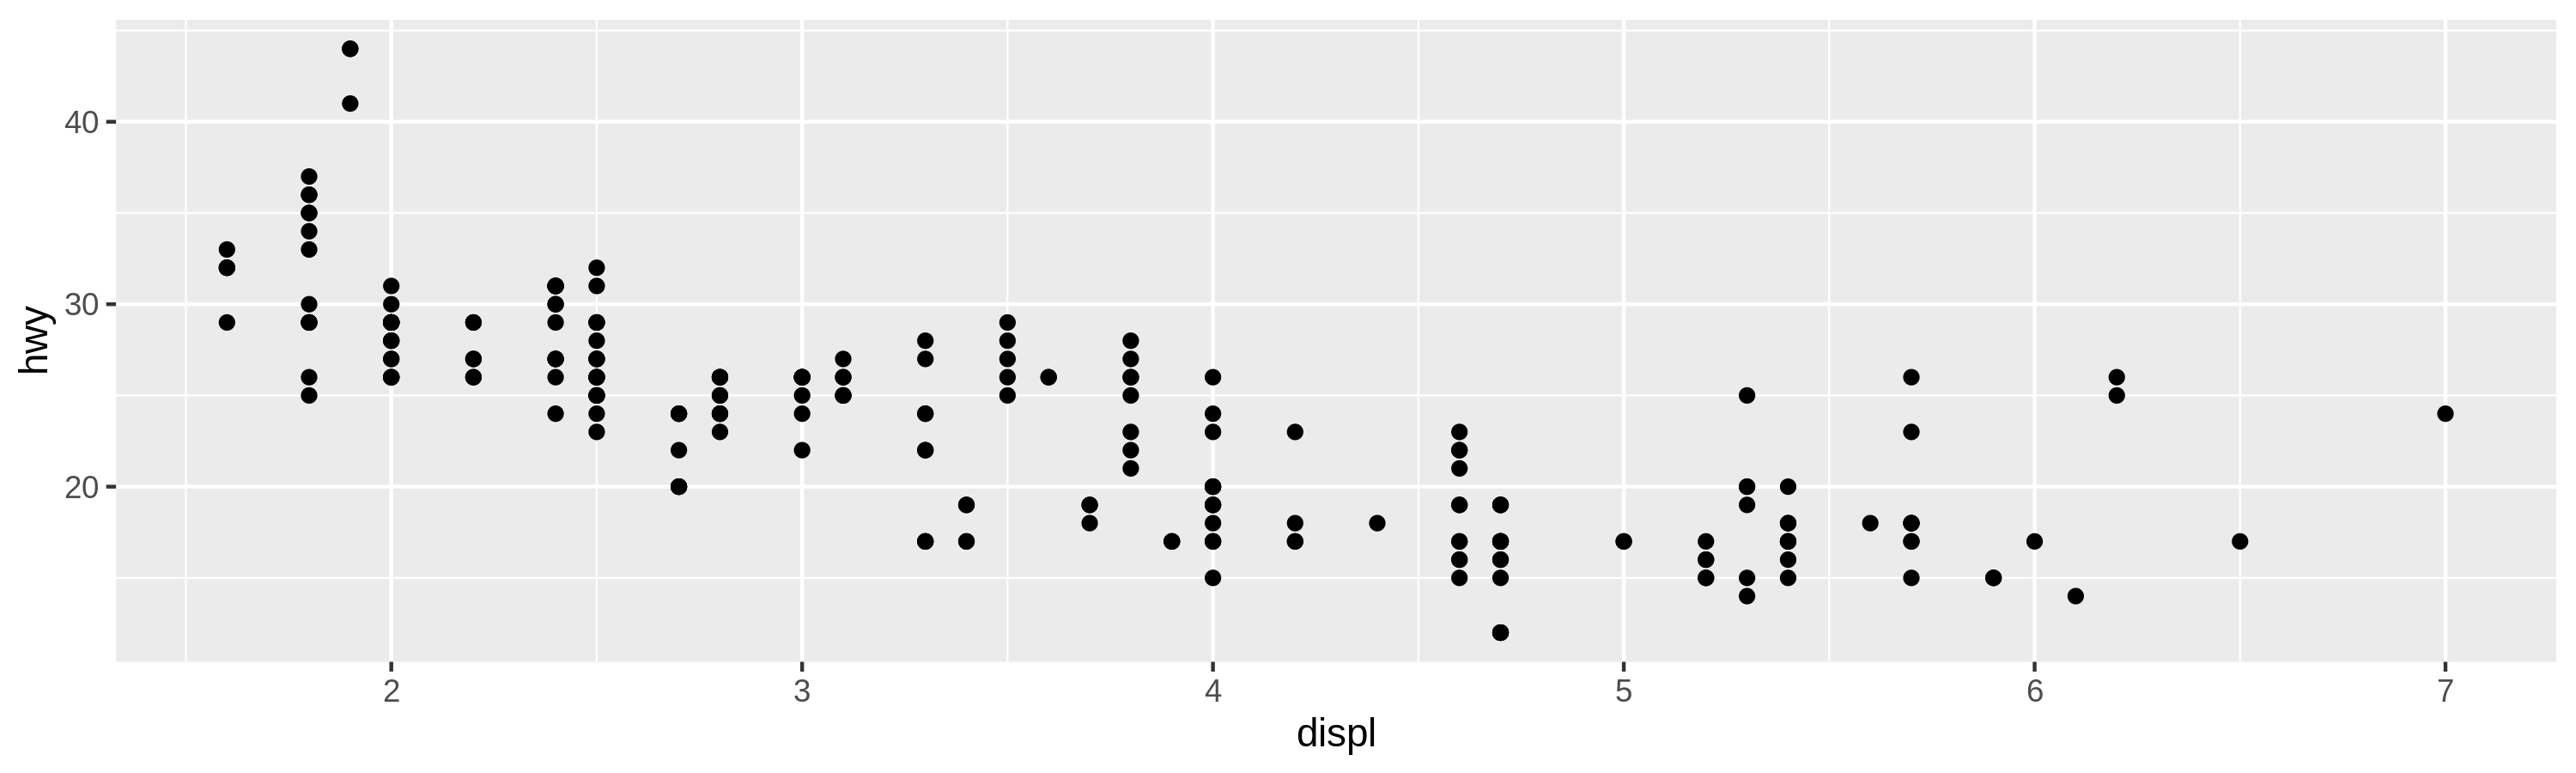

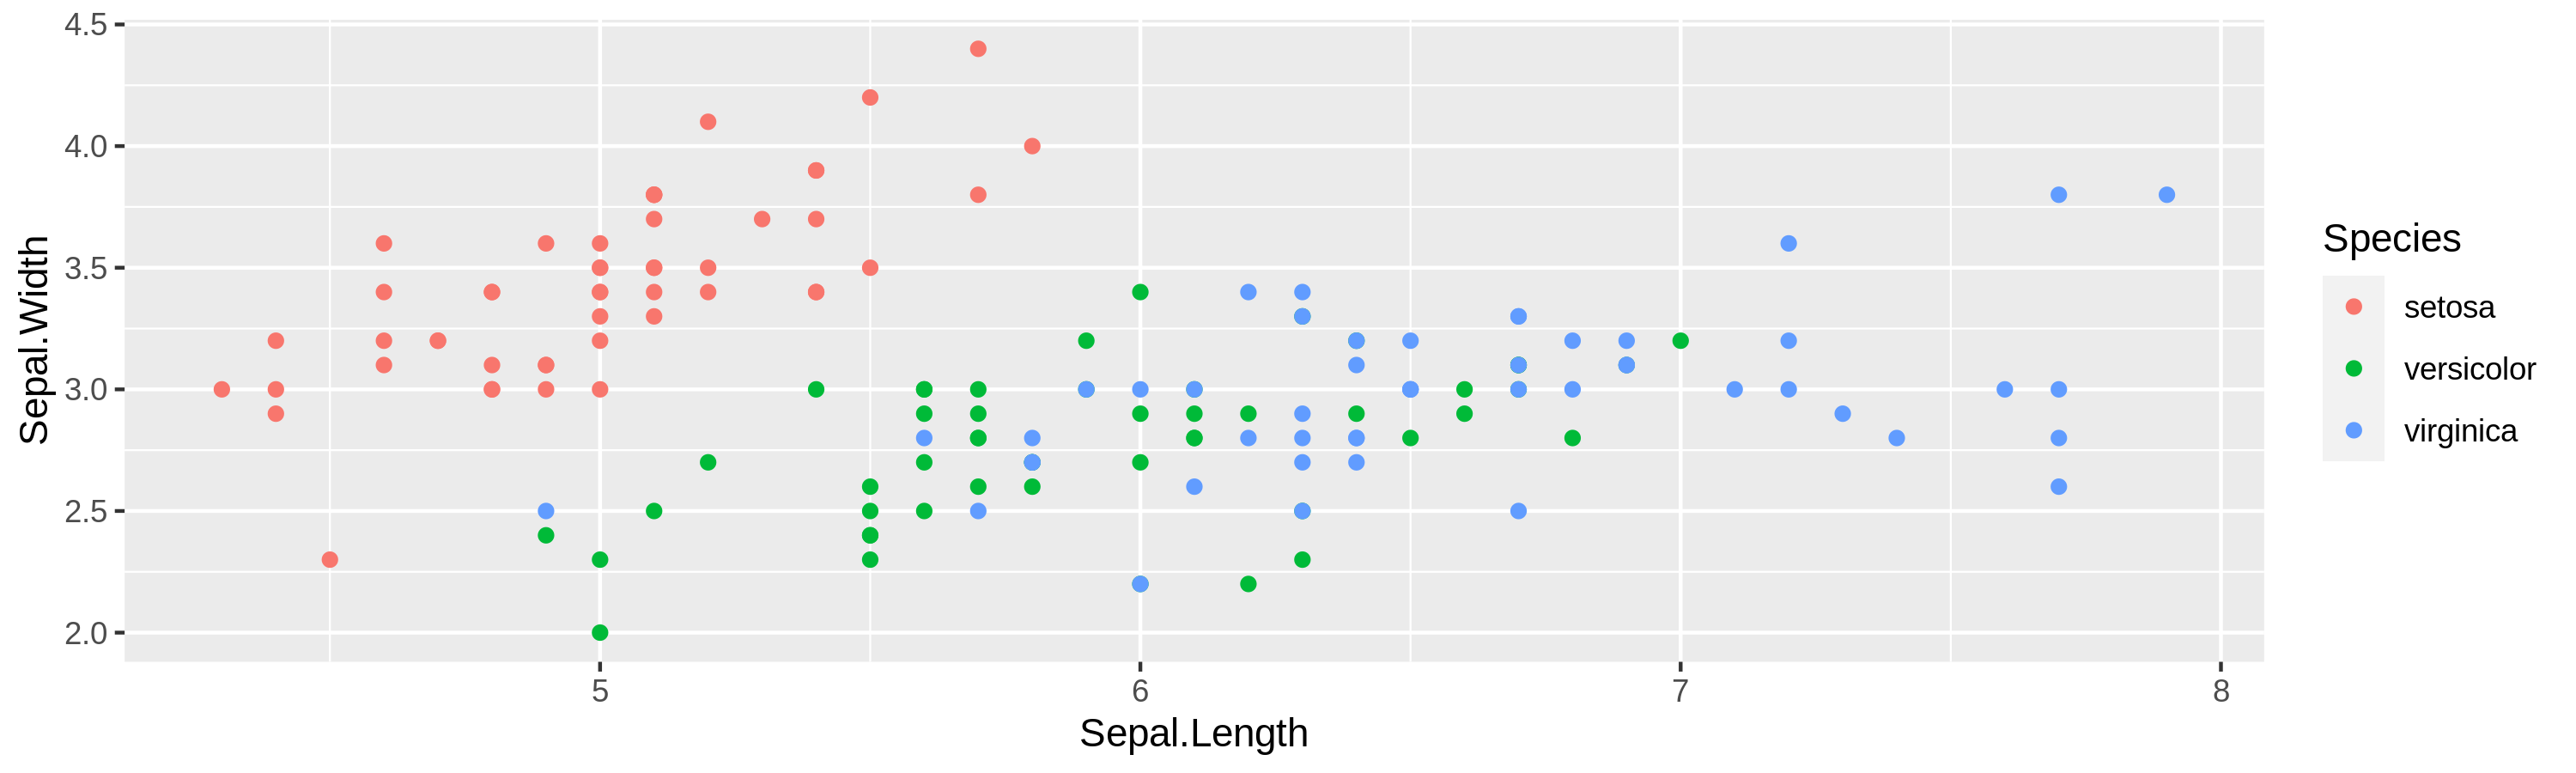

In [10]:
p = ggplot(mpg, aes( x = displ, y = hwy))
p = p + geom_point()
p

p2 = ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species ))
p2 = p2 + geom_point()
p2

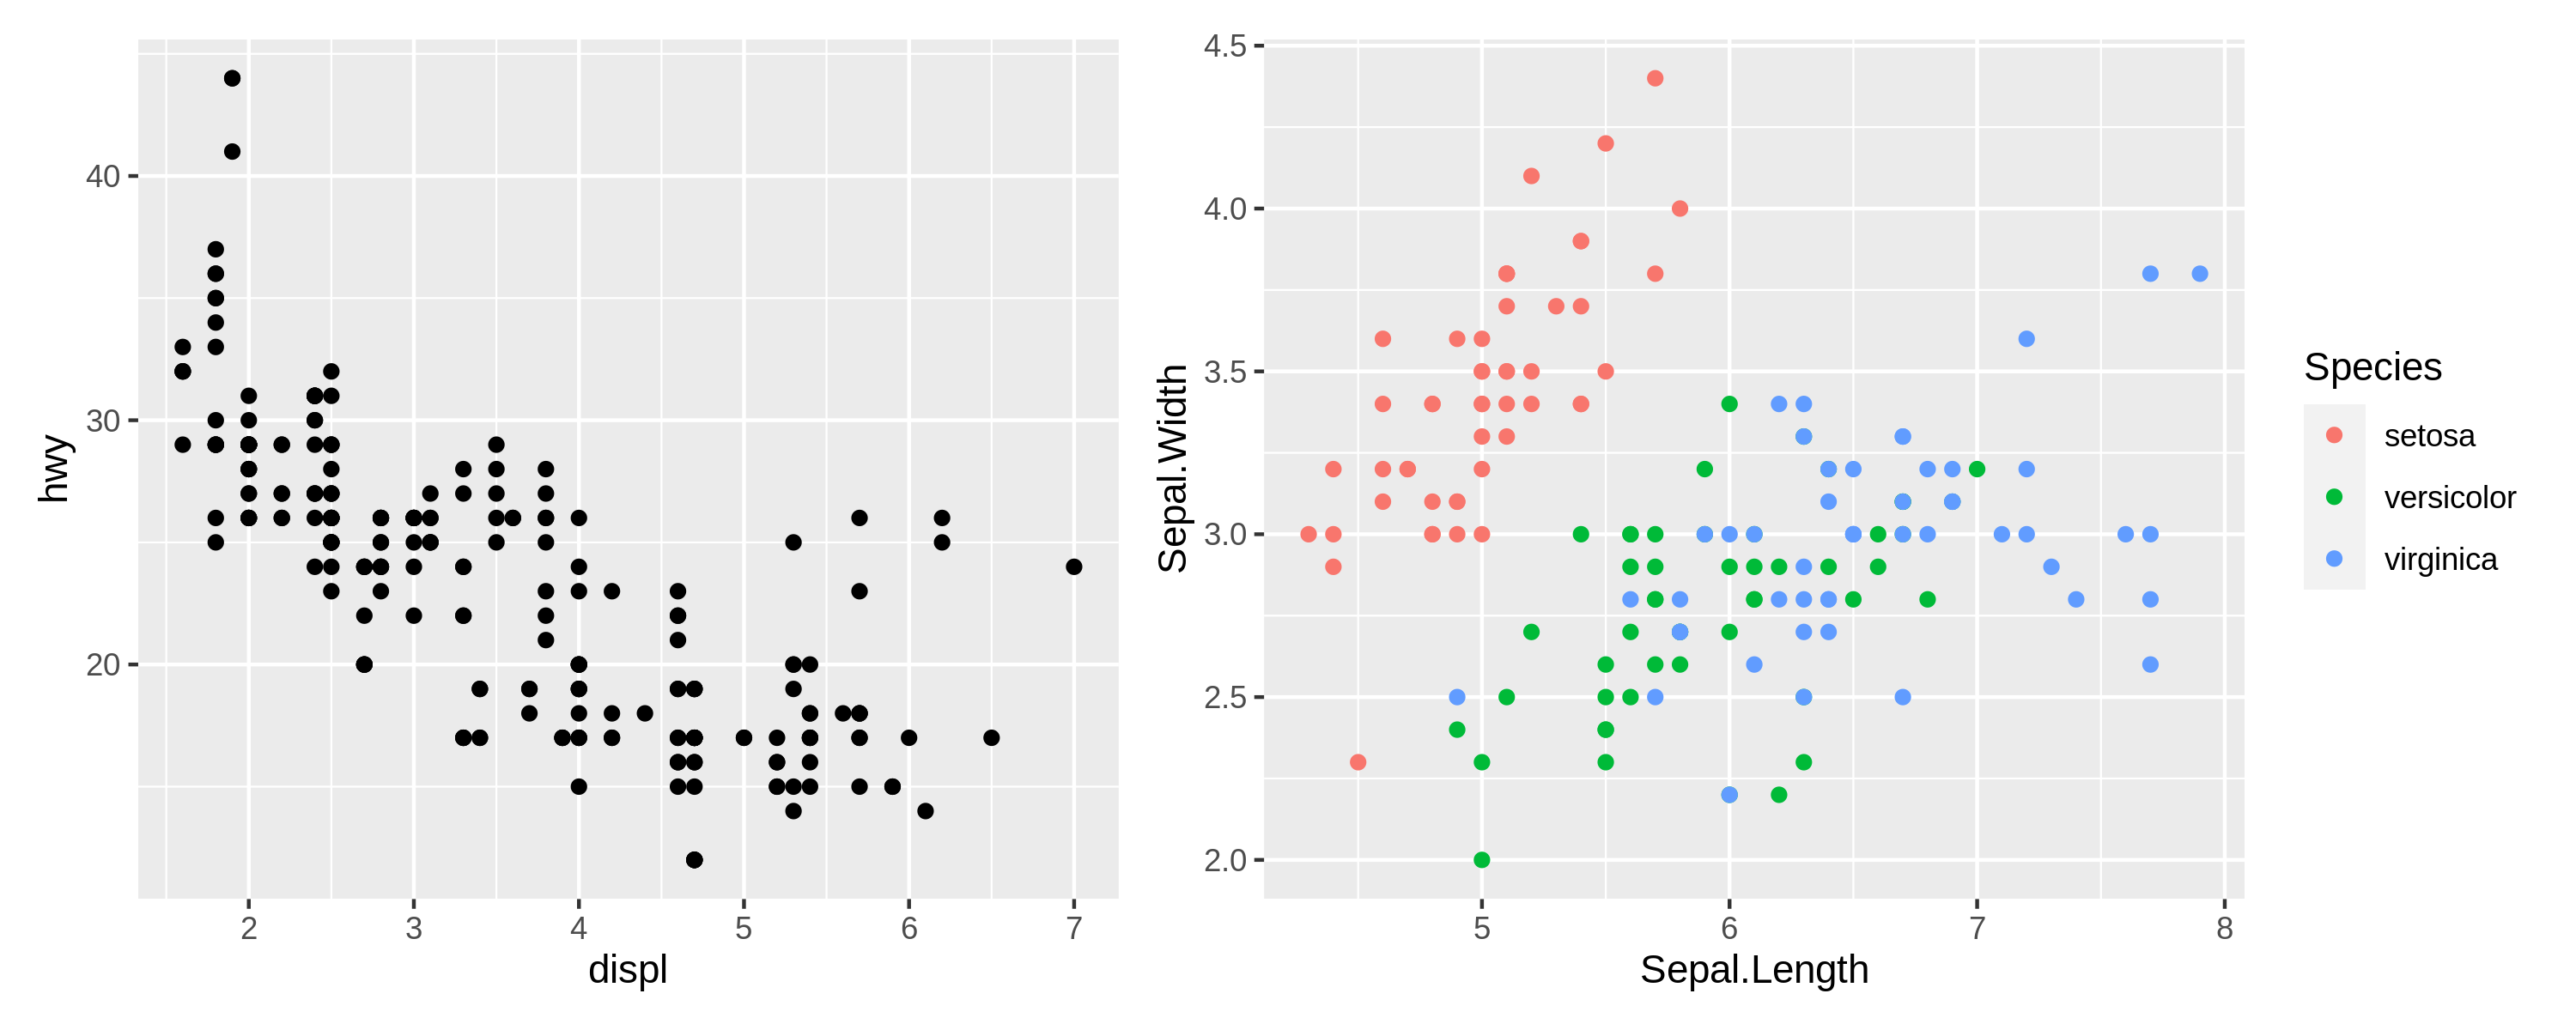

In [15]:
options(repr.plot.width=10, repr.plot.height=4)
p + p2

# 🛑 Stop here. We'll continue after we discuss the code above. 🛑

In [6]:
# Load the `palmerpenguins` dataset.

 library("palmerpenguins")

In [7]:
# What's in the penguins table?

 penguins %>% head

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Can you make this plot? 👇 What does this plot demonstrate?

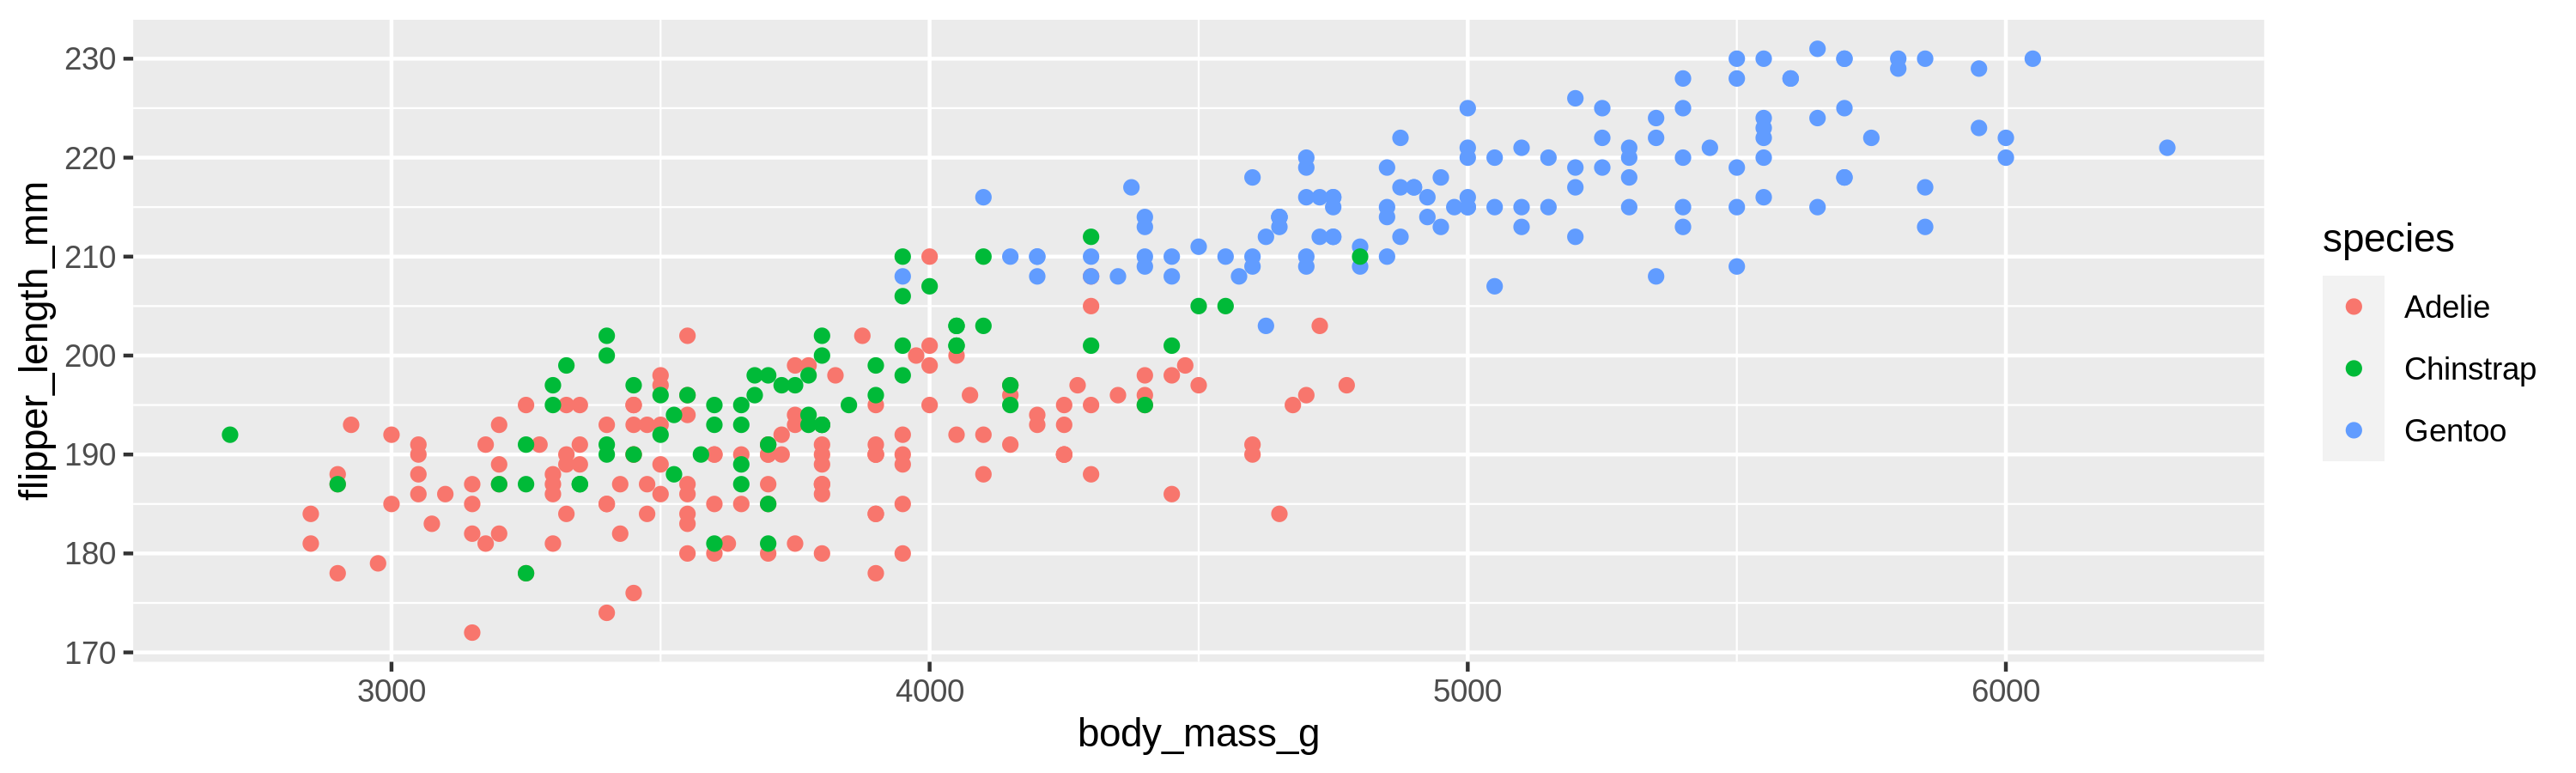

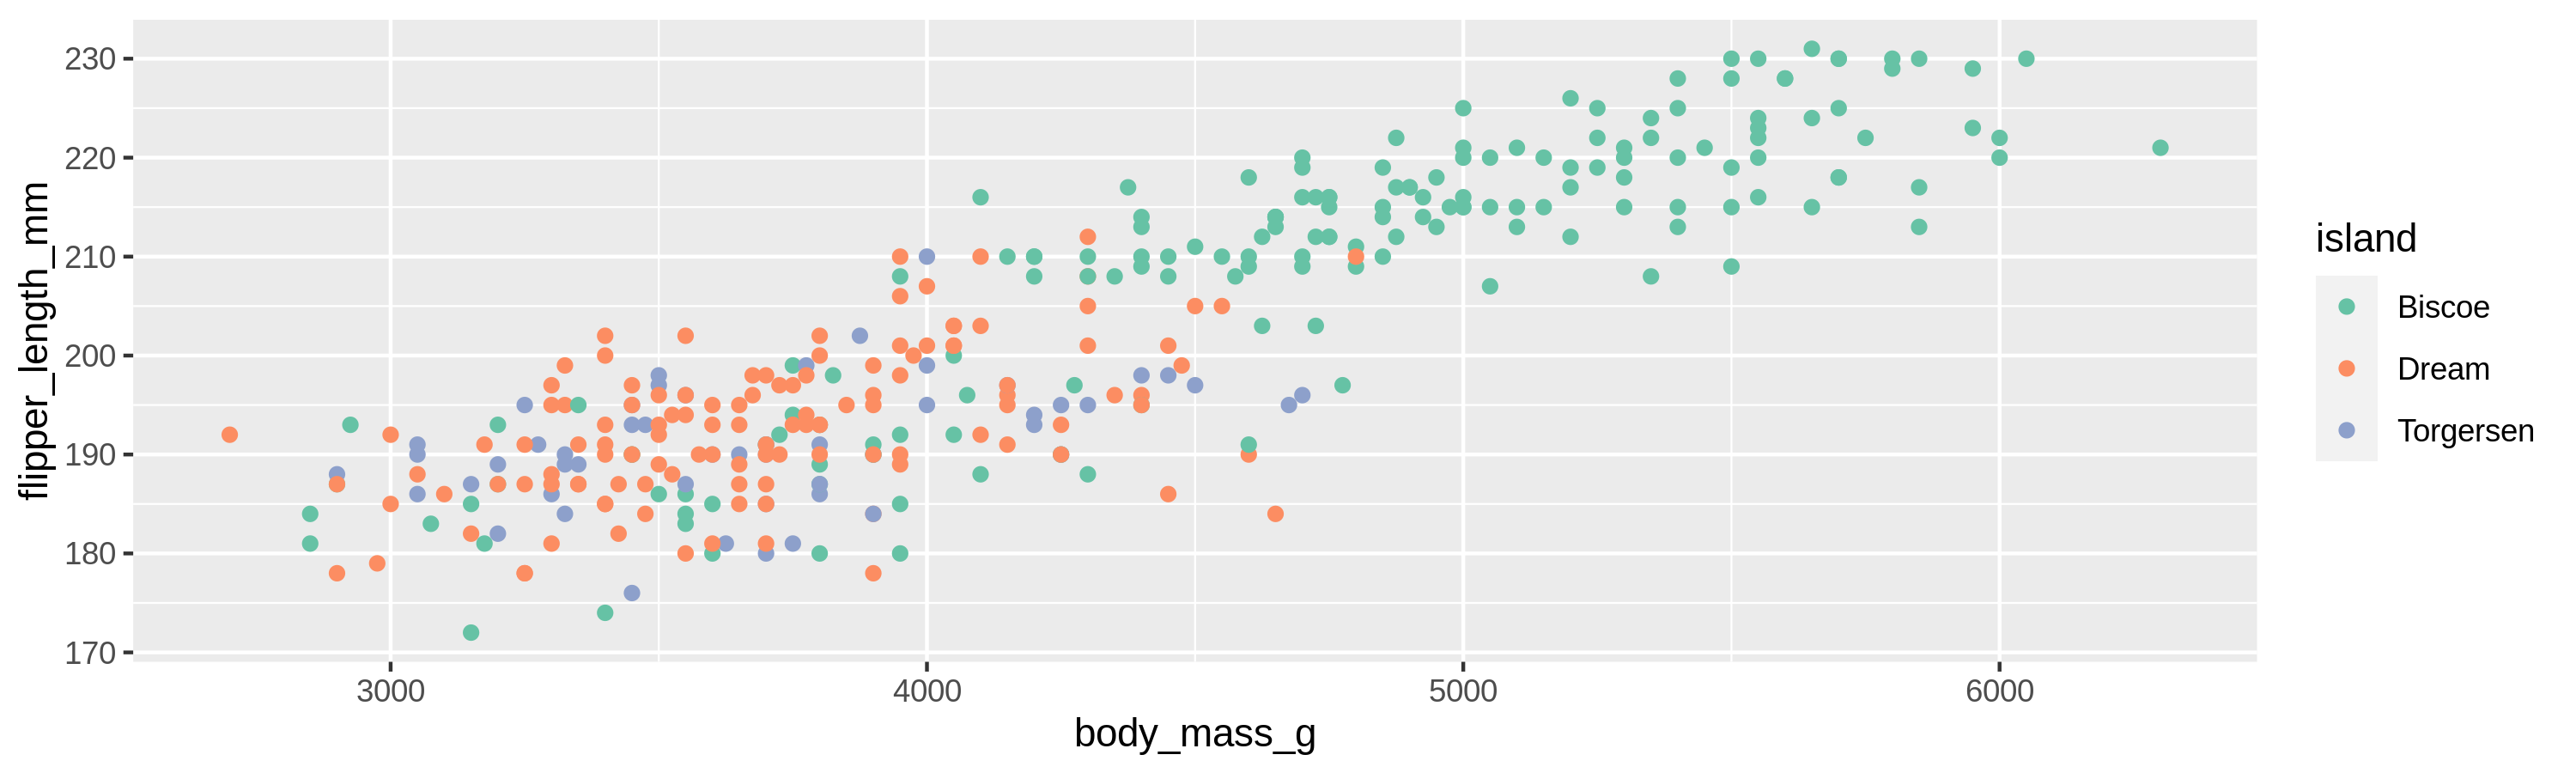

In [8]:
p = ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species))
p = p + geom_point(na.rm = TRUE)
#using "na.rm = TRUE" gets rid of the warning messages occuring since there is missing data, only looks where there is
    #non-missing data
p

p2 = ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = island))
p2 = p2 + geom_point(na.rm = TRUE)
p2 = p2 + scale_color_brewer(type = "qual", palette = "Set2")
p2

![](img/patchwork_example_penguins.png)

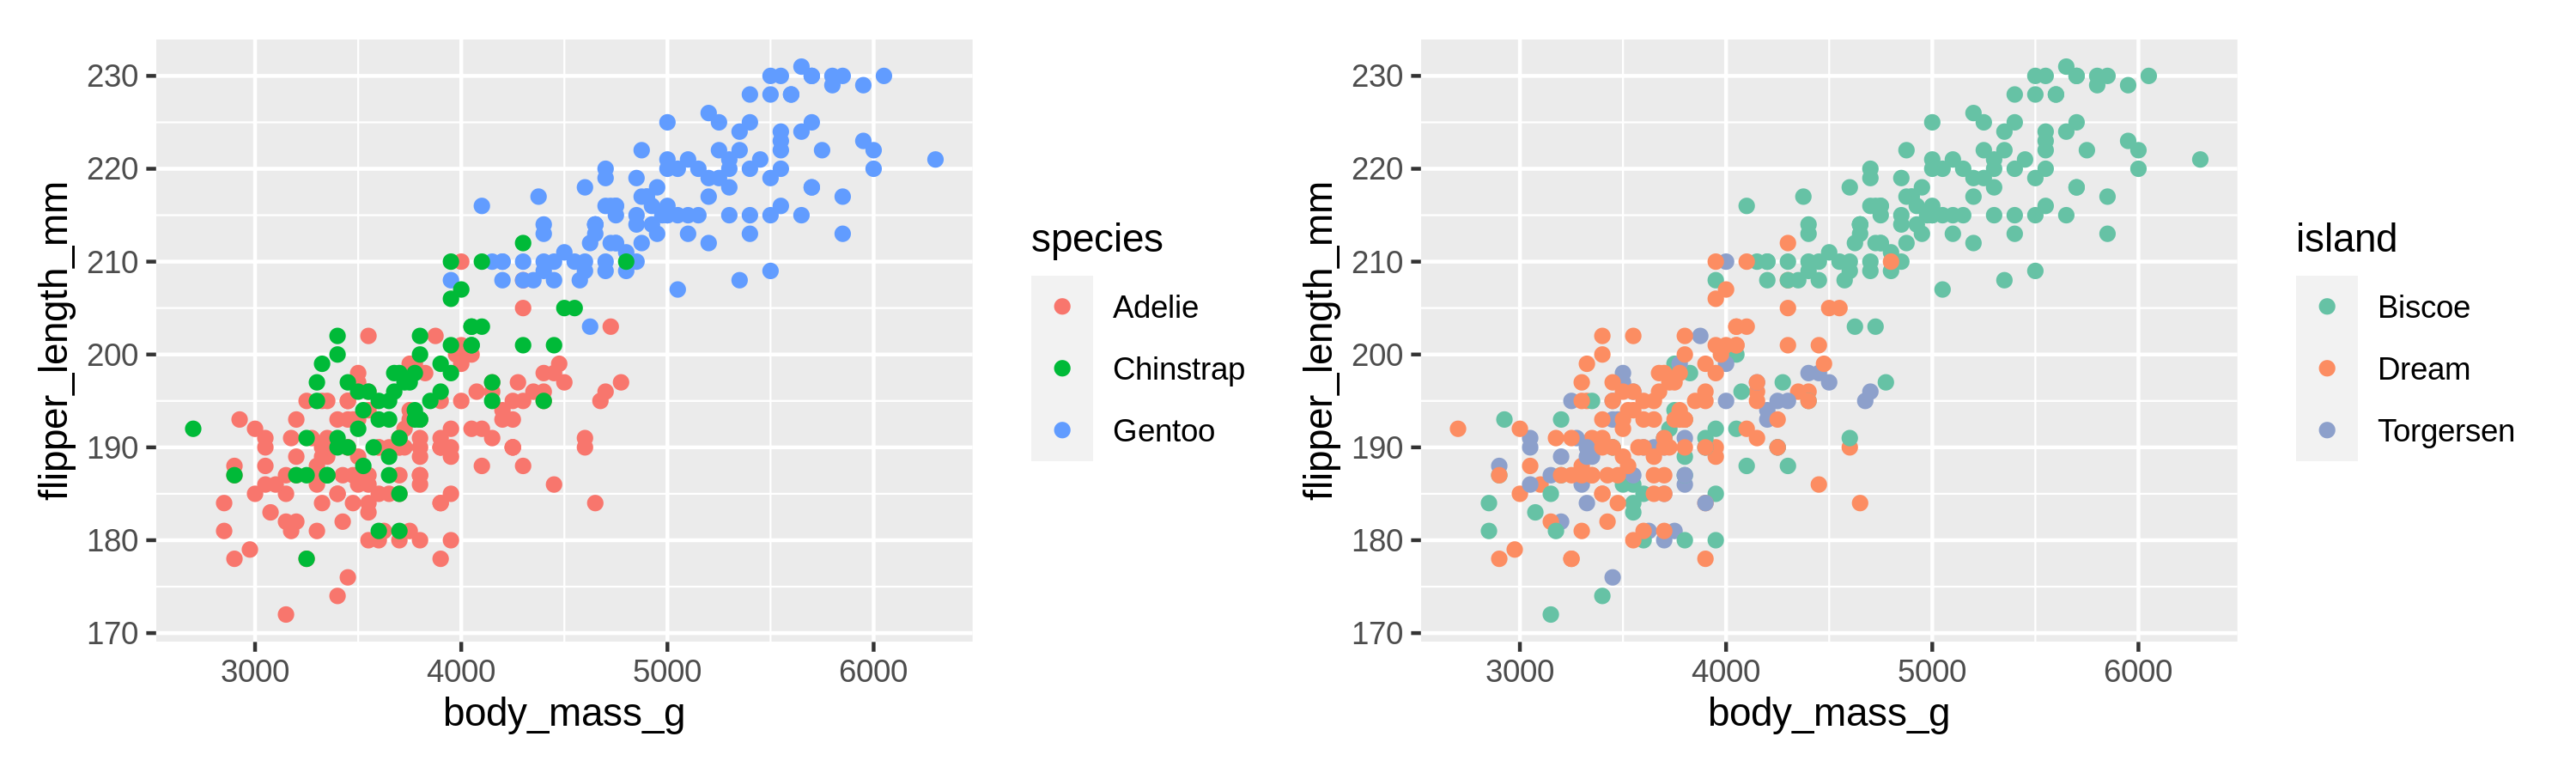

In [9]:
options(repr.plot.width=10, repr.plot.height=3)

p + p2 #+ plot_layout(guides = "collect")
#takes the legends and puts them side by side on the right if you uncomment line of code above

📍Hint: add `scale_color_brewer(type = "qual", palette = "Set2")` to adjust the colors of the second plot!

# Adding a facet grid to see how species corresponds to island type

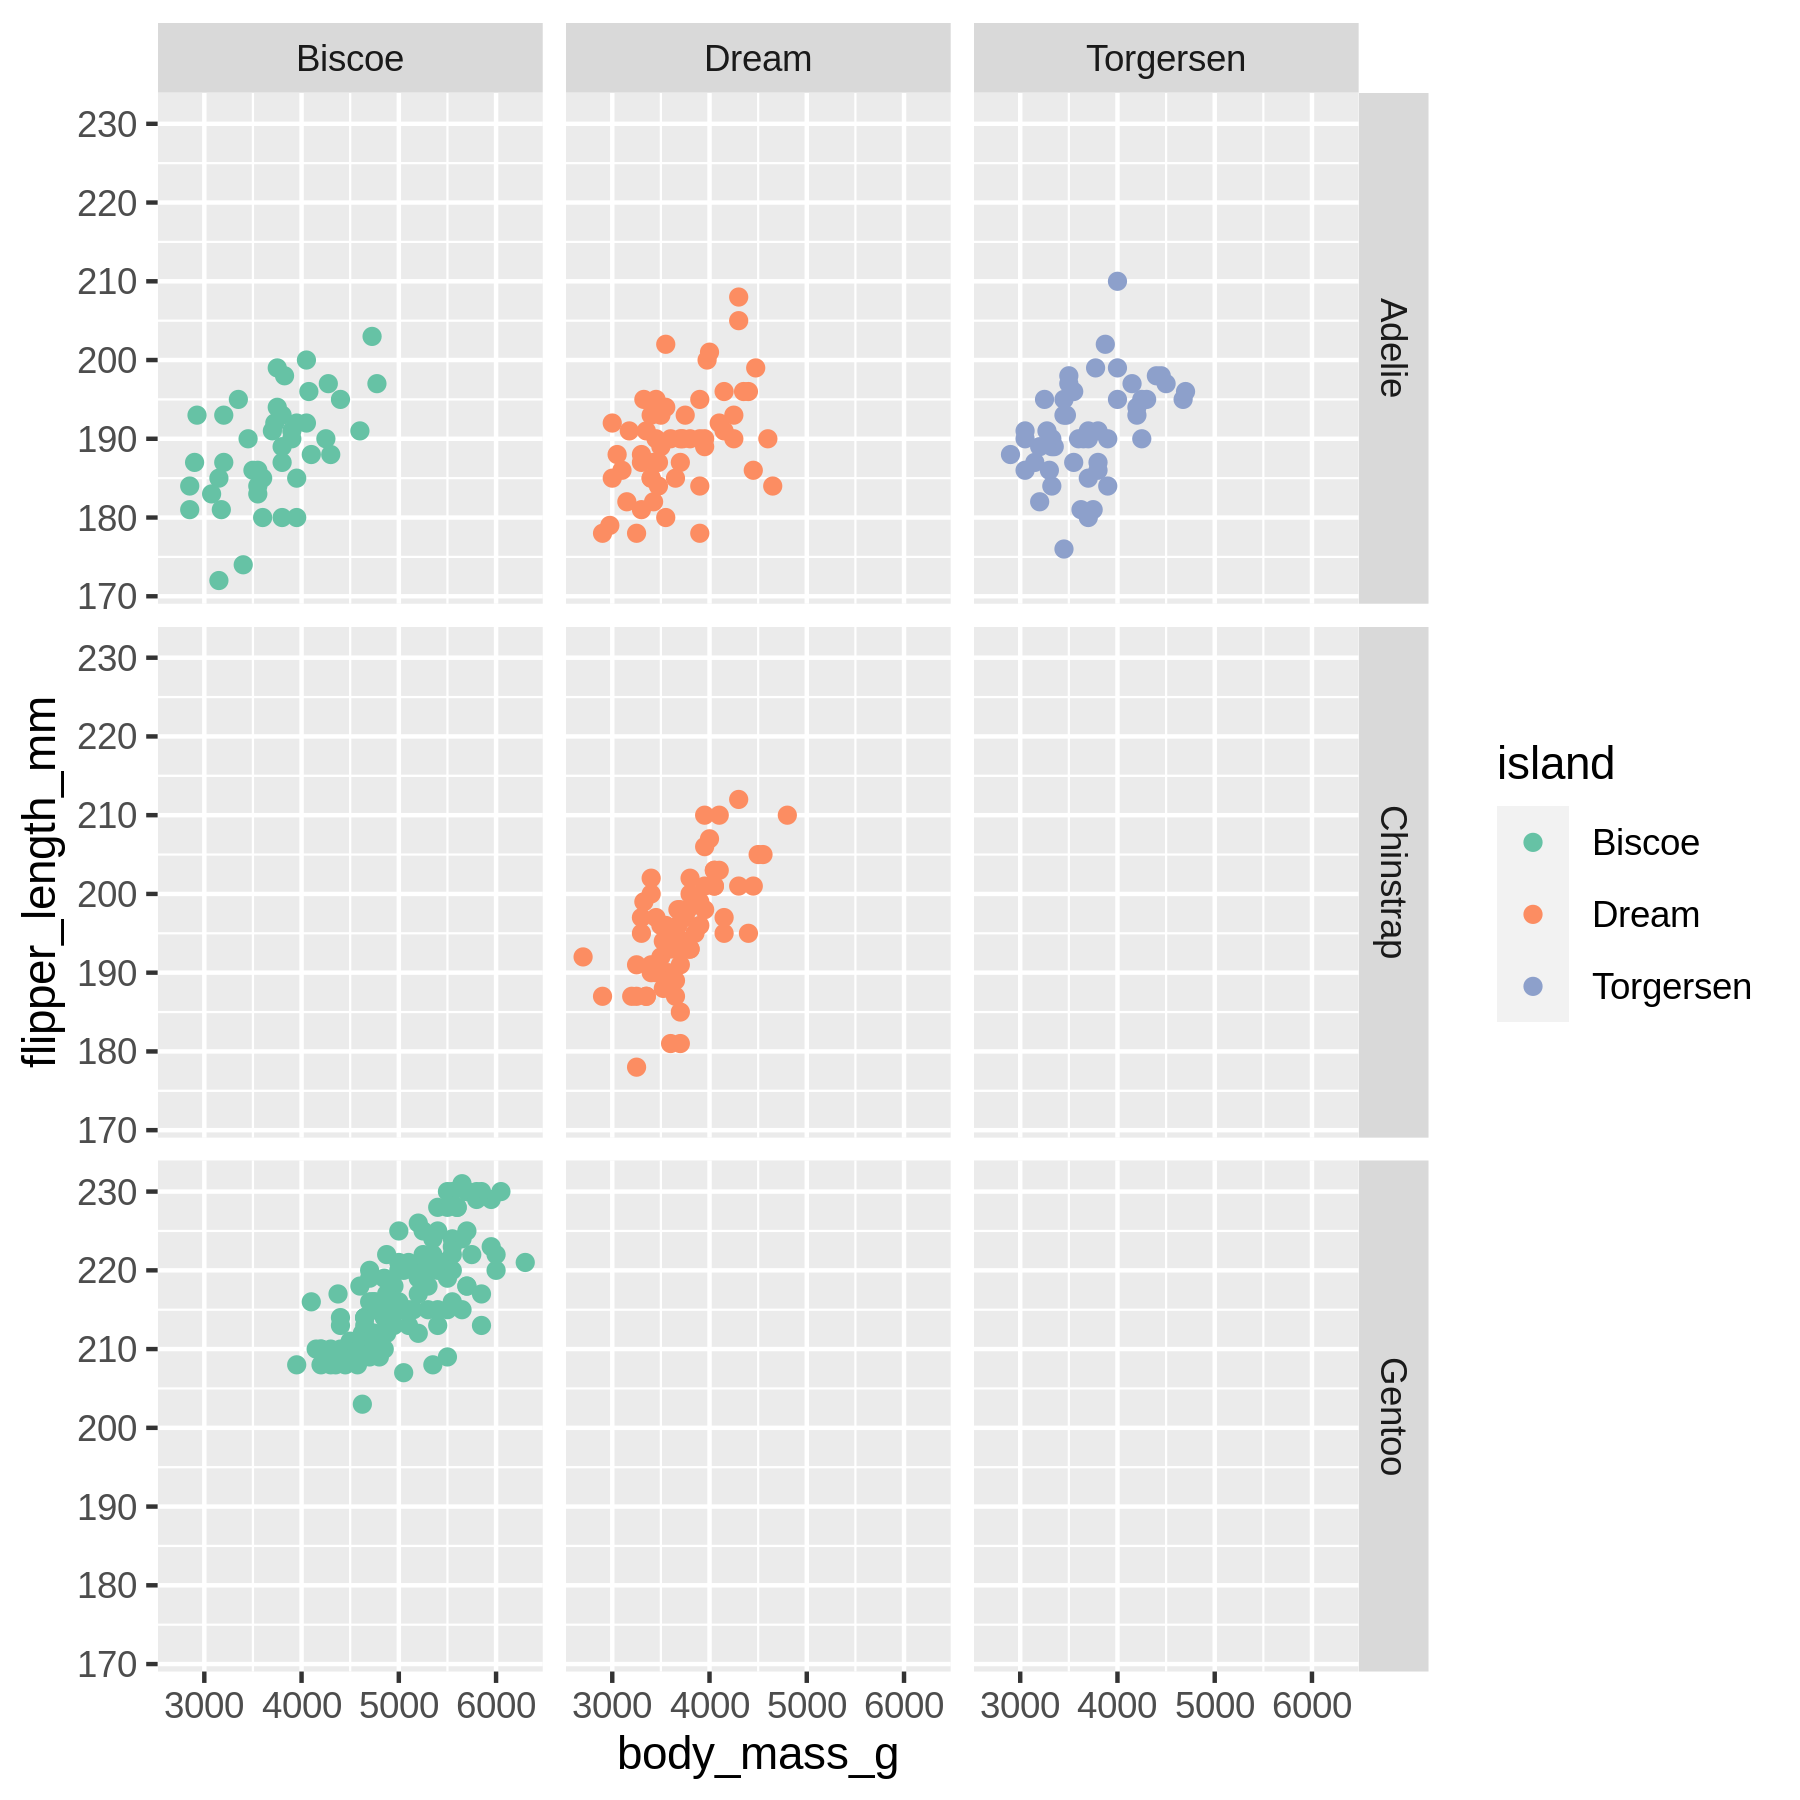

In [17]:
options(repr.plot.width=6, repr.plot.height=6)

p2 = ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = island))
p2 = p2 + geom_point(na.rm = TRUE)
p2 = p2 + facet_grid(species~island)
p2 = p2 + scale_color_brewer(type = "qual", palette = "Set2")
p2


# Another way to visualize this data from above is to use bars instead of grid
### Use stacked bar charts

For bar charts we don't need to encode the x axis (the number of penguins), we just need the y-axis (island type) and the values within each slice of y-axis (number of penguins on that island)

R will know to put N on the x-axis by giving the correct commands

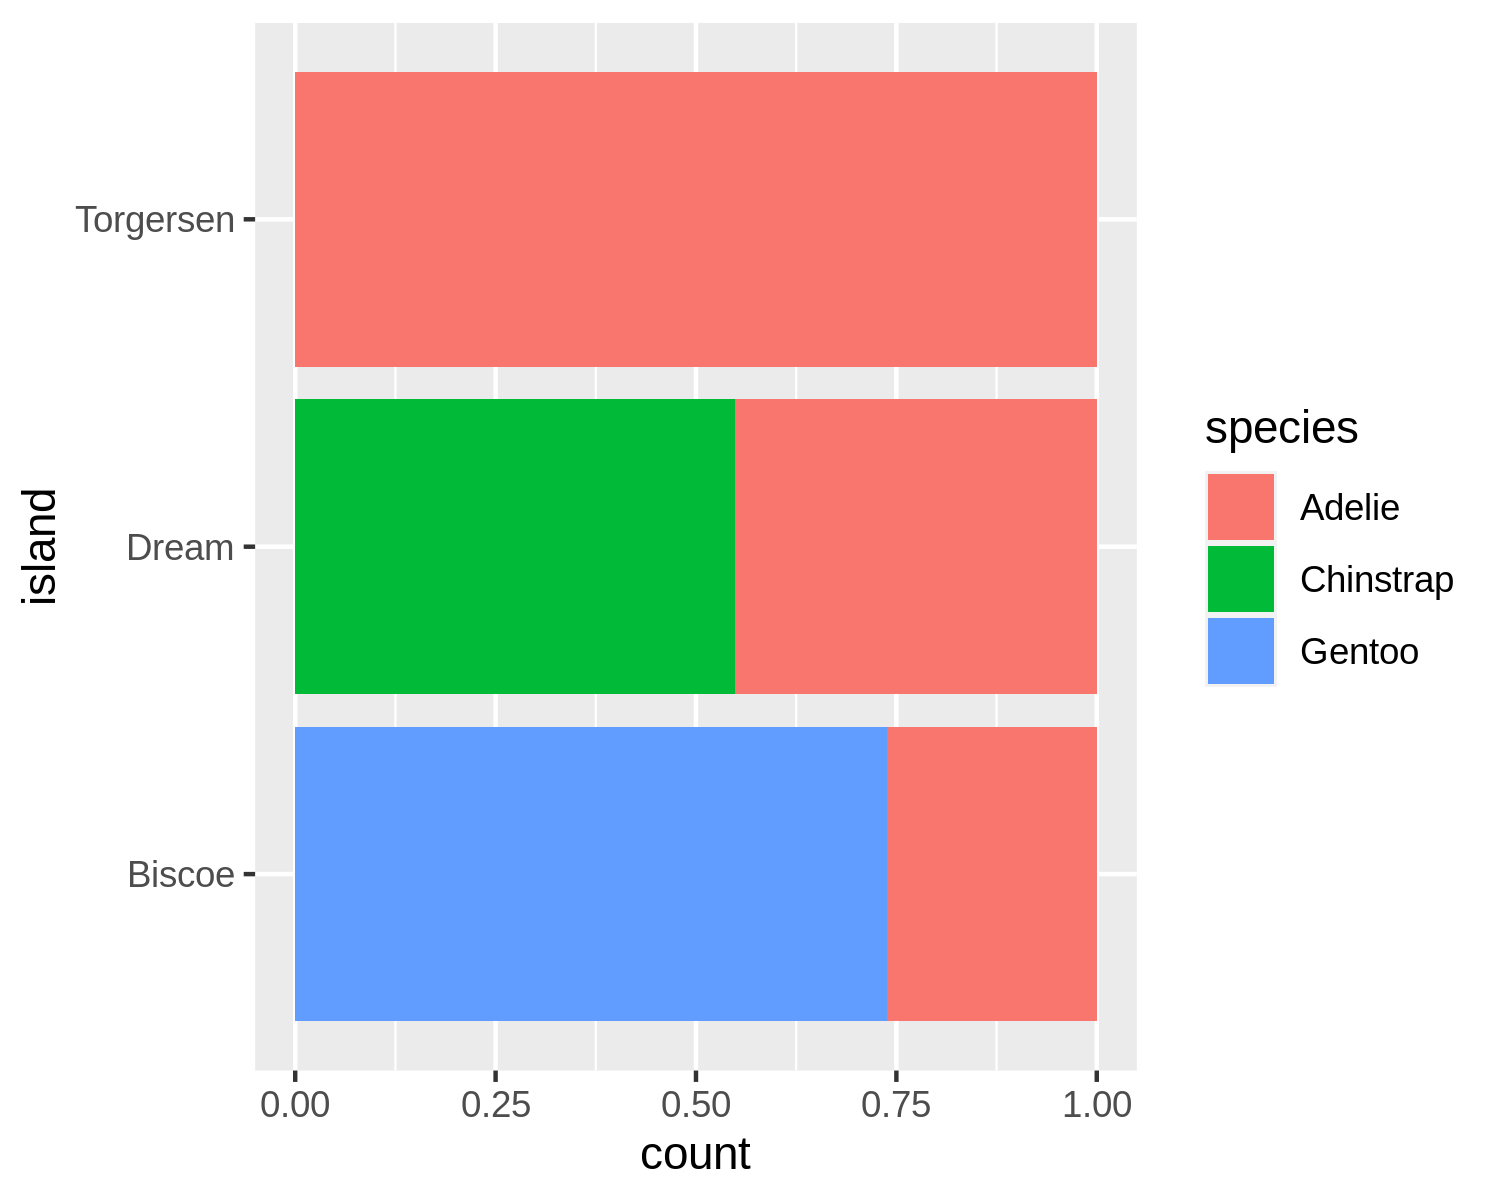

In [26]:
options(repr.plot.width=5, repr.plot.height=4)
#p = ggplot(penguins, aes(y = island, color = species))
#don't need to define the x, but need to provide a color encoding to do the work of being able to map species to island
# in R, color refers to the outline and not the fill itself
p = ggplot(penguins, aes(y = island, fill = species))
#changed the word color to fill in order to color the bars a certain way
p = p + geom_bar(position = "fill")
#adding the position = fill, it will show the fraction of each species on the island and not just the number
p = p + scale_color_brewer(type = "qual", palette = "Set2")
p